### Setup

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn import cross_validation, linear_model

In [3]:
%matplotlib inline

In [4]:
loansData = pd.read_csv('https://github.com/Thinkful-Ed/curric-data-001-data-sets/raw/master/loans/loansData.csv')
loansData.dropna(inplace=True)

### Clean up variables

In [5]:
def cleans(dat, idx, typ):
    return dat.map(lambda x: typ(x[:idx]))
loansData['Interest.Rate'] = cleans(loansData['Interest.Rate'],-1,float) # Take % sign off
loansData['Loan.Length'] = cleans(loansData['Loan.Length'], -7, int) # Take off ' months'
loansData['FICO.Score'] = cleans(loansData['FICO.Range'], 3, int) # Take 1st score in range

In [6]:
print(loansData['FICO.Score'].head())

81174    735
99592    715
80059    690
15825    695
33182    695
Name: FICO.Score, dtype: int64


In [7]:
intrate = loansData['Interest.Rate']
loanamt = loansData['Amount.Requested']
fico = loansData['FICO.Score']

### Histogram for FICO Score

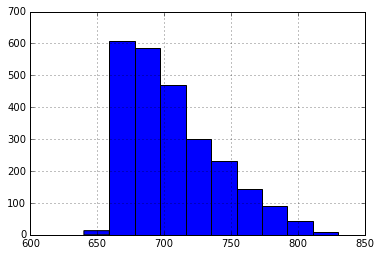

In [8]:
plt.figure()
loansData['FICO.Score'].hist()
plt.show()

# scatter_matrix

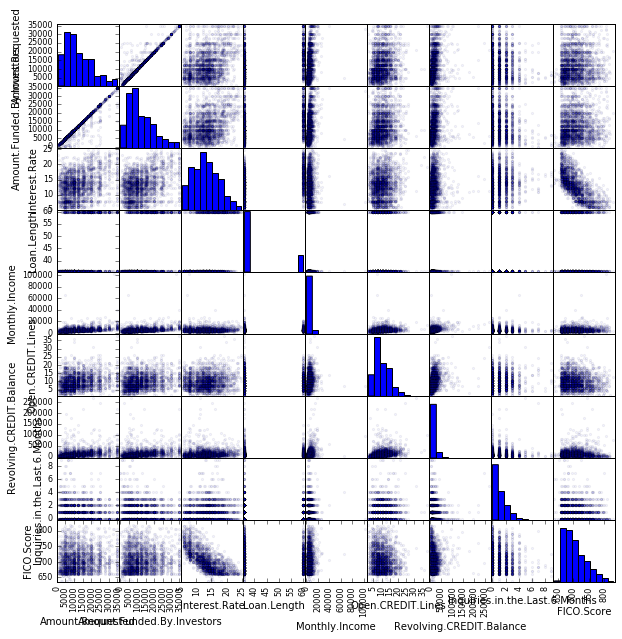

In [9]:
pd.scatter_matrix(loansData, alpha=0.05, figsize=(10,10), diagonal='hist')
plt.show()

In [10]:
y = np.matrix(intrate).transpose()
x1 = np.matrix(fico).transpose()
x2 = np.matrix(loanamt).transpose()

In [11]:
x = np.column_stack([x1,x2])

### OLS model

In [12]:
X = sm.add_constant(x)
model = sm.OLS(y,X)
f = model.fit()

In [13]:
print(f.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2389.
Date:                Sat, 02 Jul 2016   Prob (F-statistic):               0.00
Time:                        16:47:31   Log-Likelihood:                -5779.6
No. Observations:                2498   AIC:                         1.157e+04
Df Residuals:                    2495   BIC:                         1.158e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         72.9879      0.989     73.765      0.0

### Set 10-fold cross-validation using LinearRegression()

In [40]:
kf = cross_validation.KFold(len(X), 10)
kf
# for train, test in kf:
#     print("%s %s" % (train, test))

sklearn.cross_validation.KFold(n=2498, n_folds=10, shuffle=False, random_state=None)

In [29]:
regr = linear_model.LinearRegression()

### Averaged MSE, MAE, and R^2 for cross-validation

In [46]:
scores = cross_validation.cross_val_score(regr, X, y, scoring='mean_squared_error', cv=kf)
print(-scores.mean())

6.00855656657


In [42]:
scores = cross_validation.cross_val_score(regr, X, y, scoring='mean_absolute_error', cv=kf)
print(-scores.mean())

1.93993083494


In [43]:
scores = cross_validation.cross_val_score(regr, X, y, cv=kf)
print(scores.mean())

0.653435200885
